# Objective

### To predict the house price based on the features.
### Data: https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline     # to plot the diagrams within the cells

UsageError: unrecognized arguments: # to plot the diagrams within the cells


In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Remove unnecessary columns

In [21]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)

In [22]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Normalizing the data for good comparison

In [23]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
col_name = df.drop('price', axis = 1).columns[:]
x = df.loc[:, col_name]
y = df['price']

x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

print(df.head())
x.head()

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


### Plotting target variable vs rest input variables

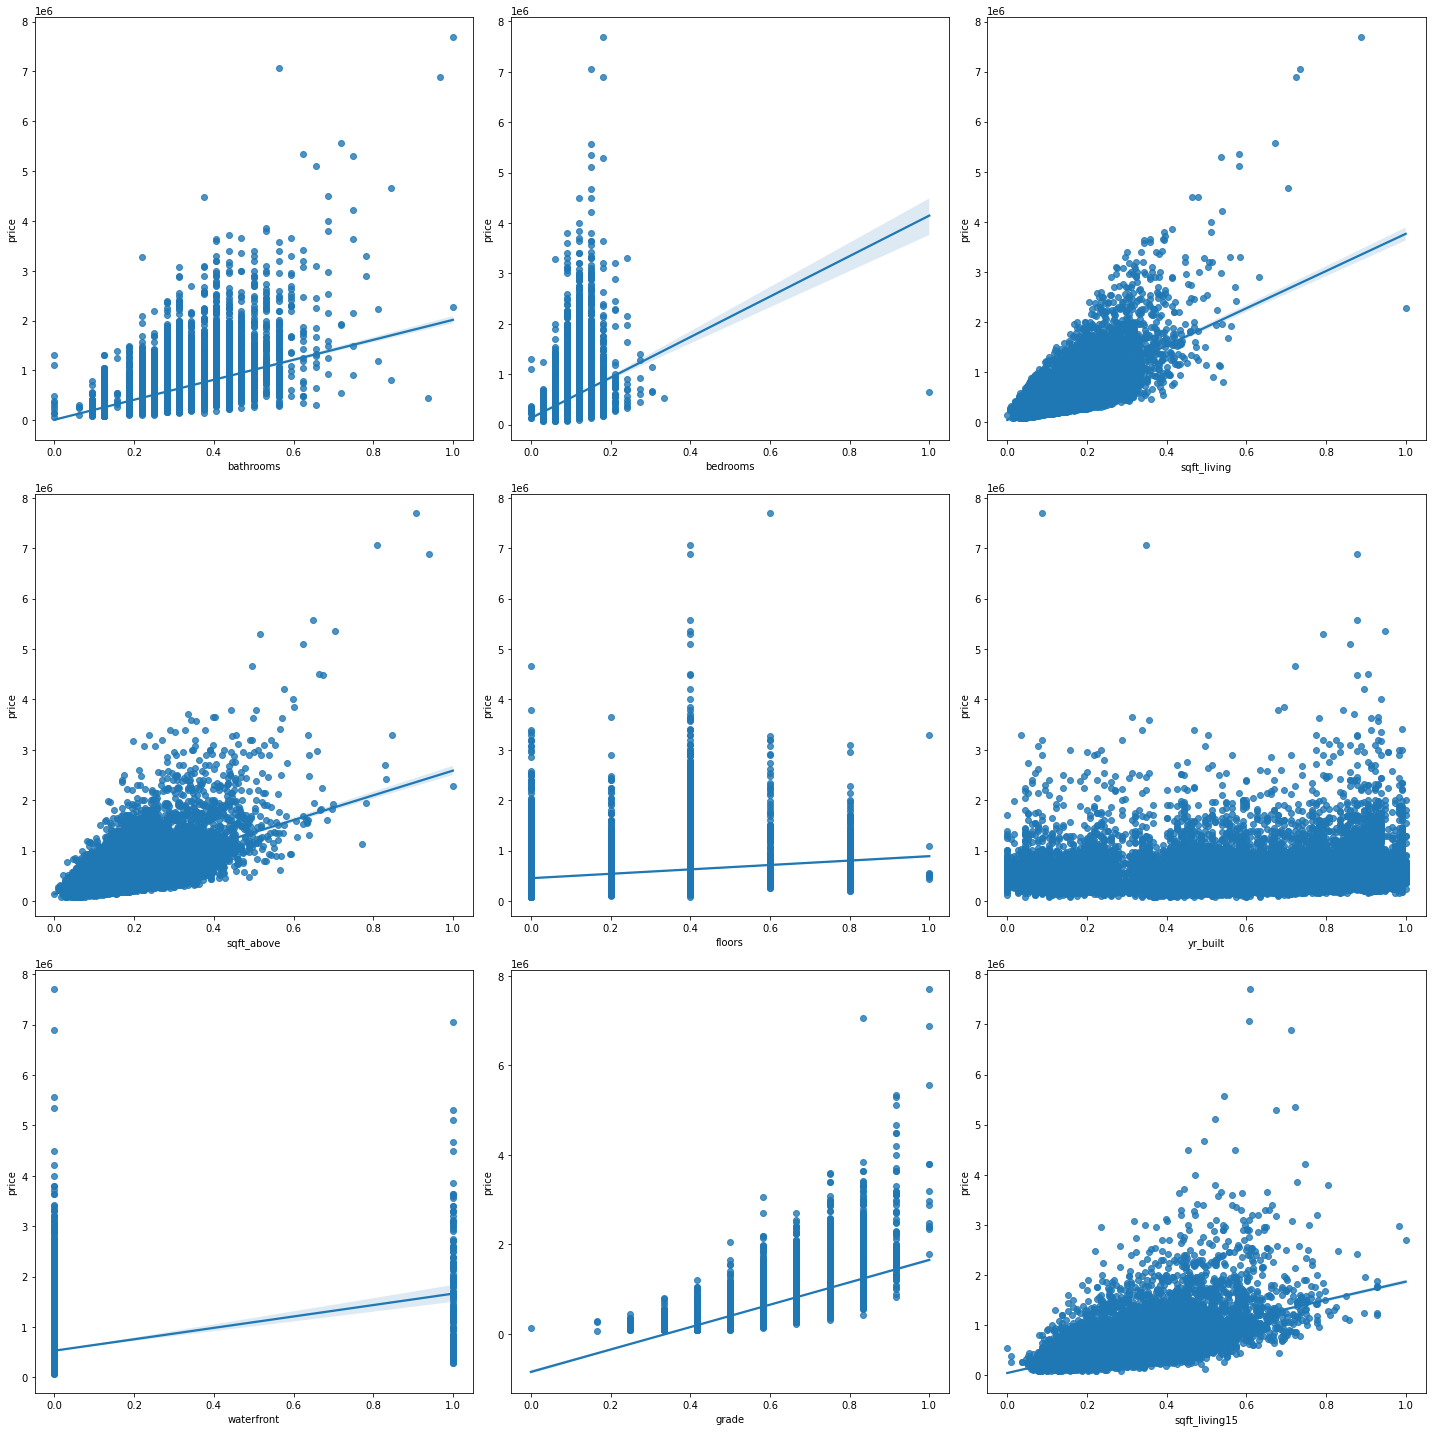

In [29]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20,20))
sns.regplot(y = df['price'], x = x['bathrooms'], ax = axs[0,0])
sns.regplot(y = df['price'], x = x['bedrooms'], ax = axs[0,1])
sns.regplot(y = df['price'], x = x['sqft_living'], ax = axs[0,2])
sns.regplot(y = df['price'], x = x['sqft_above'], ax = axs[1,0])
sns.regplot(y = df['price'], x = x['floors'], ax = axs[1,1])
sns.regplot(y = df['price'], x = x['yr_built'], ax = axs[1,2])
sns.regplot(y = df['price'], x = x['waterfront'], ax = axs[2,0])
sns.regplot(y = df['price'], x = x['grade'], ax = axs[2,1])
sns.regplot(y = df['price'], x = x['sqft_living15'], ax = axs[2,2])
plt.tight_layout()

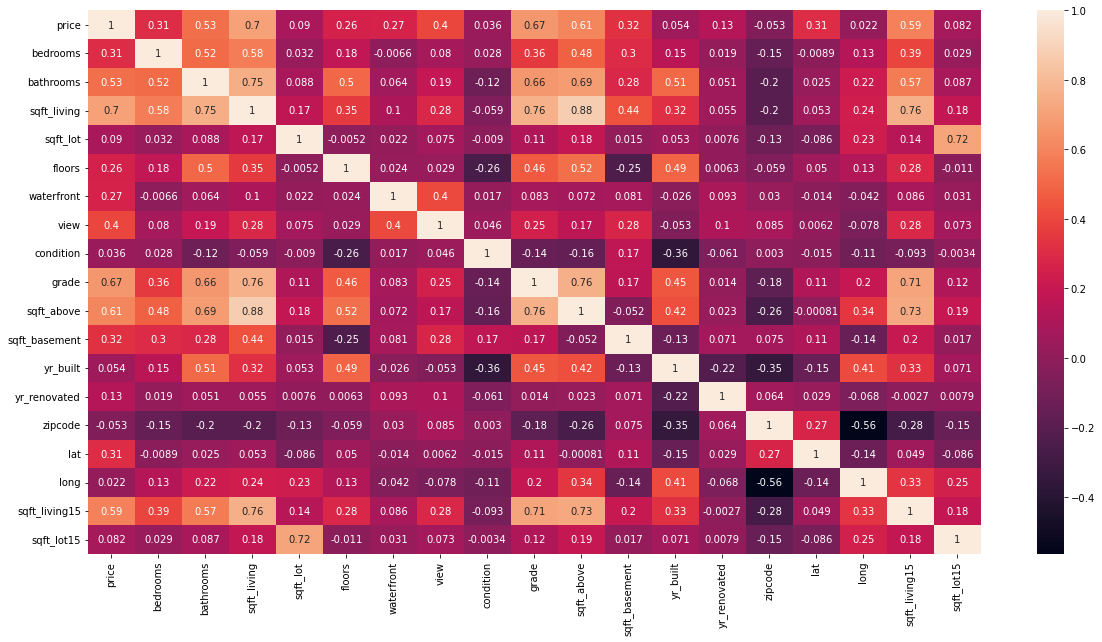

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Splitting data into train and test dataset

In [31]:
features = df.drop('price', axis = 1)
target = df['price']
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 2)
print('Train features shape :', train_features.shape)
print('Train target shape :', train_target.shape)
print('Test features shape :', test_features.shape)
print('Teat target shape :', test_target.shape)


Train features shape : (17290, 18)
Train target shape : (17290,)
Test features shape : (4323, 18)
Teat target shape : (4323,)


### Building Model

In [32]:
model = LinearRegression(normalize = True)
model.fit(train_features, train_target)

LinearRegression(normalize=True)

### Interpreting model
###### y = bo + b1_x1 + b2_x2 + b3_x3 + ....

In [33]:
print('Model intercept is :', model.intercept_, '\n')
print('Model coefficient is :', model.coef_, '\n')

for i in range(len(features.columns)):
    print(features.columns[i], ':', model.coef_[i])
    

Model intercept is : 7719917.40487829 

Model coefficient is : [-3.59976727e+04  3.98434355e+04  9.09322767e+01  9.67067500e-02
  9.18147889e+03  5.72891183e+05  5.15893201e+04  2.70135977e+04
  9.39877474e+04  9.26508549e+01  6.56344411e+01 -2.60083826e+03
  2.36612107e+01 -5.98137670e+02  6.08900406e+05 -2.16276094e+05
  2.12063447e+01 -3.33473260e-01] 

bedrooms : -35997.672706986836
bathrooms : 39843.435519027094
sqft_living : 90.9322767317571
sqft_lot : 0.09670674998450864
floors : 9181.478891581331
waterfront : 572891.1826029764
view : 51589.32006057352
condition : 27013.5976640788
grade : 93987.74735653016
sqft_above : 92.65085492899841
sqft_basement : 65.63444112346495
yr_built : -2600.8382586225803
yr_renovated : 23.66121074586853
zipcode : -598.1376696830207
lat : 608900.4061788952
long : -216276.09448405207
sqft_living15 : 21.20634471905117
sqft_lot15 : -0.3334732595873553


### Evaluating model for training set

In [35]:
train_target_pred = model.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)

output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, '\n')

print('Model training performance :')
print('----------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is'.format(r2))
print('\n')

test_target_pred = model.predict(test_features)
rmse = (np.sqrt(mean_squared_error(test_target, test_target_pred)))
r2 = r2_score(test_target, test_target_pred)

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, '\n')

print('Model testing performance :')
print('---------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

           price     Predicted     Difference
15166  1760000.0  1.664131e+06  -95869.417577
13416   360000.0  4.955052e+05  135505.243438
206     677900.0  6.510666e+05  -26833.391634
4286    300000.0  4.239115e+05  123911.548615
18065   220000.0  4.148003e+05  194800.301709
19714   505000.0  4.630413e+05  -41958.675065
15312   190000.0  3.222396e+05  132239.588813
6293    236000.0  8.582642e+04 -150173.580931
16265   847000.0  8.507247e+05    3724.713696
466     465000.0  4.778028e+05   12802.761756 

Model training performance :
----------------------------
RMSE is 201805.2700214636
R2 score is


           price     Predicted     Difference
6638    735000.0  7.145258e+05  -20474.194497
7366   1150000.0  1.422906e+06  272906.381479
3158    350500.0  4.197864e+05   69286.405761
9117    860000.0  1.289003e+06  429003.414659
3392    122000.0 -3.416211e+04 -156162.105670
305     725000.0  7.016756e+05  -23324.397753
14462   417000.0  6.648500e+05  247850.005110
6196    594950.0  5.393657

##### The difference between the actual and the predicted value is high because
##### 1) The data is too disperse.
##### 2)Some of the variables might not have a linear relationship with price.
##### 3)Some data can be cleaned further (Example: year built, zipcode)

##### This can be solved by
##### 1)Cleaning the data 
##### 2)Trying out other models
##### 3)Play around with the train_test_split ratio.